In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
%matplotlib inline

from scipy import stats

In [2]:
import os
os.listdir('input')

['fulfilment_center_info.csv',
 'meal_info.csv',
 'sample_submission_hSlSoT6.csv',
 'test_processed.csv',
 'test_QoiMO9B.csv',
 'train.csv',
 'train_processed.csv']

### __Data Load__

In [3]:
df_train = pd.read_csv('input/train.csv')
df_meal = pd.read_csv('input/meal_info.csv')
df_center = pd.read_csv('input/fulfilment_center_info.csv')
df_test = pd.read_csv('input/test_QoiMO9B.csv')

In [4]:
display(df_train.head())
display(df_test.head())
display(df_meal.head())
display(df_center.head())

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
print('distinct meal id in meal_info: ',df_meal.meal_id.nunique())
print('distinct meal id in train: ',df_train.meal_id.nunique())
print('distinct meal id in train: ',df_test.meal_id.nunique())
print('*************************************************************')
print('distinct center id in center_info: ',df_center.center_id.nunique())
print('distinct center id in train: ',df_train.center_id.nunique())
print('distinct center id in train: ',df_test.center_id.nunique())

distinct meal id in meal_info:  51
distinct meal id in train:  51
distinct meal id in train:  51
*************************************************************
distinct center id in center_info:  77
distinct center id in train:  77
distinct center id in train:  77


In [6]:
df_train = pd.merge(df_train, df_meal, how='inner', on = 'meal_id')
df_train = pd.merge(df_train, df_center, how='inner', on = 'center_id')

df_test = pd.merge(df_test, df_meal, how='inner', on = 'meal_id')
df_test = pd.merge(df_test, df_center, how='inner', on = 'center_id')

In [7]:
df_train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [8]:
df_train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

### __Analysis__

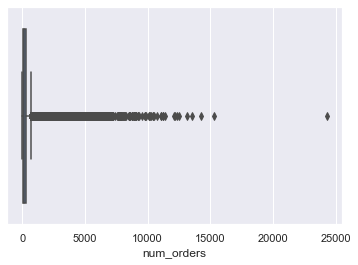

In [11]:
sns.boxplot(df_train['num_orders'])

In [12]:
def get_stats(df,columns):
    fig, axs = plt.subplots(1,2)
    for column in columns:
        df2 = df[np.isfinite(df[column])]
        count, division = np.histogram(df2[column])
        null_value_stats = df[df[column].isnull()]
        print(f"Column name: {column}")
        print(f"Total Rows: {len(df)}")
        print(f"Positive values row count: {len(df[(df[column]>=0)])}")
        print(f"Negative values rowt: {len(df[(df[column]<0)])}")
        print(f"Null values row count: { null_value_stats.shape[0]}")
        print(f"Column summary")
        print(df[column].describe())
        print(f"Data_Slice: {division}")
        print(f"Count: {count}")
        df.boxplot(column=[column], ax=axs[0])
        df[column].plot.hist(bins=10, alpha=0.5, ax=axs[1])
        
        print("***********************************")
        print("                                   ")
        print("***********************************")

Column name: base_price
Total Rows: 456548
Positive values row count: 456548
Negative values rowt: 0
Null values row count: 0
Column summary
count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64
Data_Slice: [ 55.35  136.442 217.534 298.626 379.718 460.81  541.902 622.994 704.086
 785.178 866.27 ]
Count: [ 18537  70719 118989  83827  50595  41824  21604  41702   8743      8]
***********************************
                                   
***********************************
Column name: checkout_price
Total Rows: 456548
Positive values row count: 456548
Negative values rowt: 0
Null values row count: 0
Column summary
count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
25%         228.950000
50%         296.820000
75%         445.230000
max         866.270000
Name: checkout_price, d

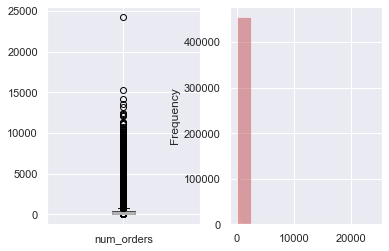

In [13]:
#from pandas.api.types import is_numeric_dtype
#results = []
#for col in df_train.columns:
#    if is_numeric_dtype(df_train[col]):
#        results.append(col)
#get_stats(df_train,results)
get_stats(df_train,['base_price','checkout_price','op_area','num_orders'])

In [14]:
#tmp_df = df_train[['checkout_price','base_price','num_orders','discount']]
tmp_df = df_train[['num_orders']]
tmp = np.abs(stats.zscore(tmp_df))
print(np.where(tmp > 30))

(array([ 63582,  78187, 148700, 371843, 391413, 391414, 391415, 392684],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [15]:
tmp_df.nlargest(10, 'num_orders')

,num_orders
391413,24299
391415,15336
391414,14229
371843,13580
392684,13150
78187,12489
63582,12327
148700,12177
115019,12137
161259,11380


In [16]:
df_train.drop([df_train.index[391413] , df_train.index[391415]], inplace = True)
df_train.count()

id                       456546
week                     456546
center_id                456546
meal_id                  456546
checkout_price           456546
base_price               456546
emailer_for_promotion    456546
homepage_featured        456546
num_orders               456546
category                 456546
cuisine                  456546
city_code                456546
region_code              456546
center_type              456546
op_area                  456546
dtype: int64

In [17]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
outlier_fraction = 0.1
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

In [18]:
df_train['discount'] = df_train['base_price'] - df_train['checkout_price']
df_train['rate_of_discount'] = df_train['discount'] / df_train['base_price']

df_test['discount'] = df_test['base_price'] - df_test['checkout_price']
df_test['rate_of_discount'] = df_test['discount'] / df_test['base_price']

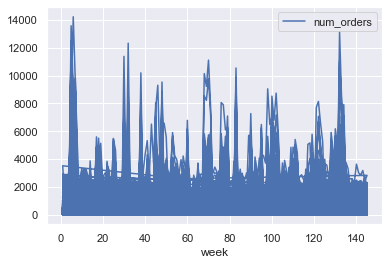

In [19]:
df_train.plot(x='week',y='num_orders')

In [20]:
def order_plot(df,col):
    df.reset_index().plot(col, 'num_orders')
    _ = plt.title("Orders Trend")
    _ = plt.xlabel(col)
    _ = plt.ylabel("Average Orders")

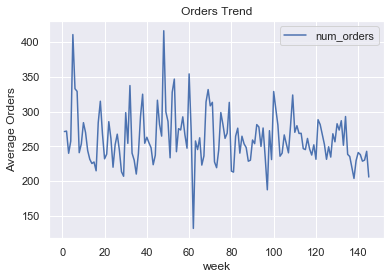

In [21]:
tmp = df_train[['week', 'num_orders']].groupby('week').mean()
#overall_orders_trend.head()
order_plot(tmp,'week')

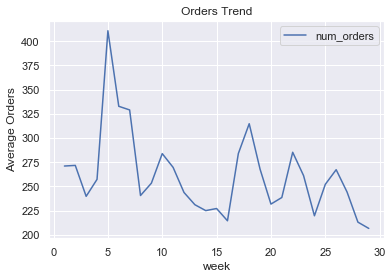

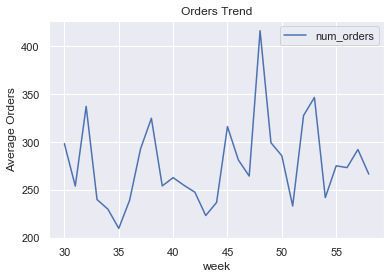

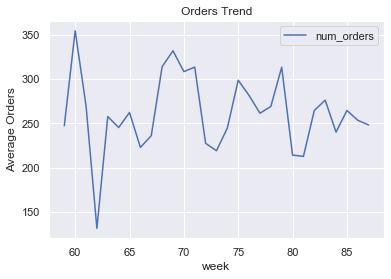

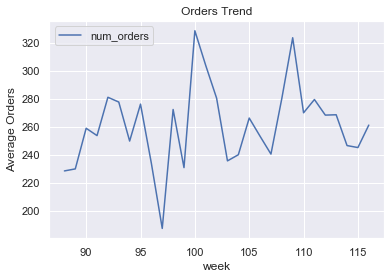

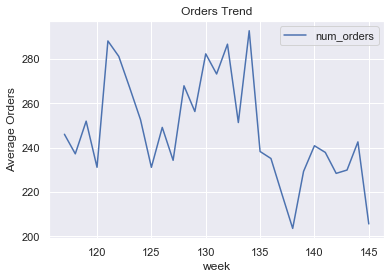

In [22]:
chunk_size = int(tmp.shape[0] / 5)
for start in range(0, tmp.shape[0], chunk_size):
    df_subset = tmp.iloc[start:start + chunk_size]
    order_plot(df_subset,'week')

In [23]:
df_train['week_sin'] = \
        np.sin(2 * np.pi * df_train['week'] / 52.143)
df_train['week_cos'] = \
        np.cos(2 * np.pi * df_train['week'] / 52.143)

df_test['week_sin'] = \
        np.sin(2 * np.pi * df_test['week'] / 52.143)
df_test['week_cos'] = \
        np.cos(2 * np.pi * df_test['week'] / 52.143)

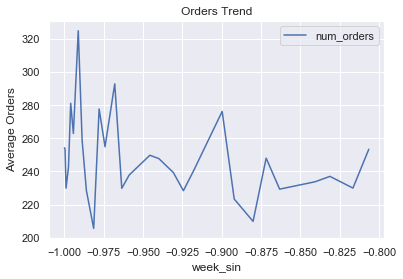

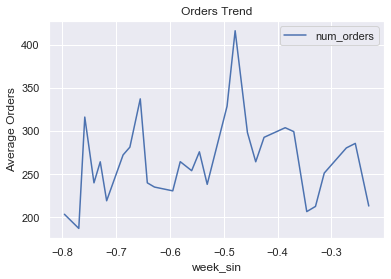

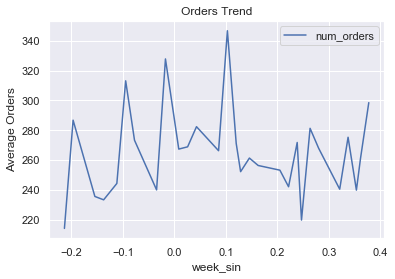

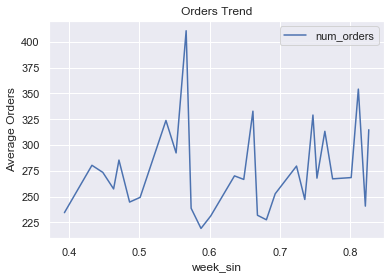

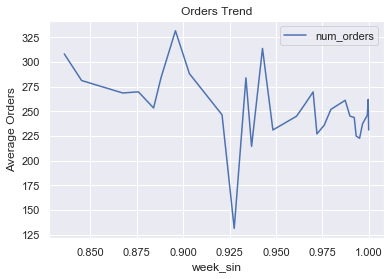

In [24]:
tmp = df_train[['week_sin', 'num_orders']].groupby('week_sin').mean()

chunk_size = int(tmp.shape[0] / 5)
for start in range(0, tmp.shape[0], chunk_size):
    df_subset = tmp.iloc[start:start + chunk_size]
    order_plot(df_subset, 'week_sin')

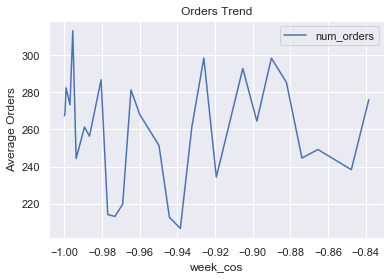

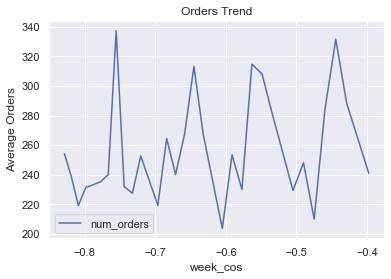

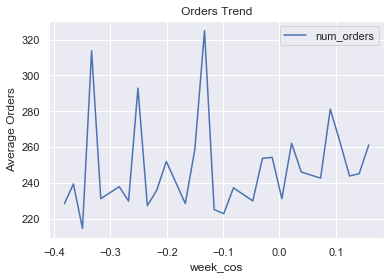

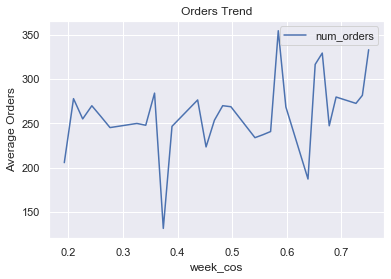

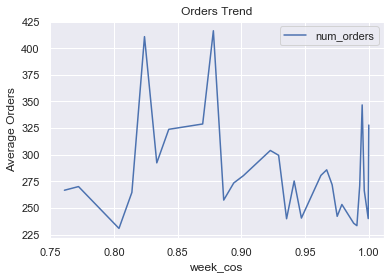

In [25]:
tmp = df_train[['week_cos', 'num_orders']].groupby('week_cos').mean()

chunk_size = int(tmp.shape[0] / 5)
for start in range(0, tmp.shape[0], chunk_size):
    df_subset = tmp.iloc[start:start + chunk_size]
    order_plot(df_subset, 'week_cos')

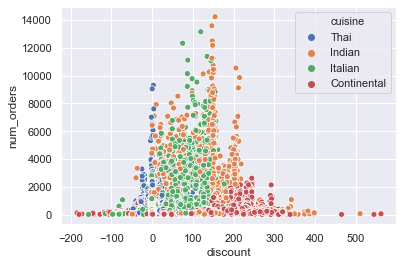

In [26]:
ax = sns.scatterplot(x="discount", y="num_orders", hue="cuisine", data=df_train)

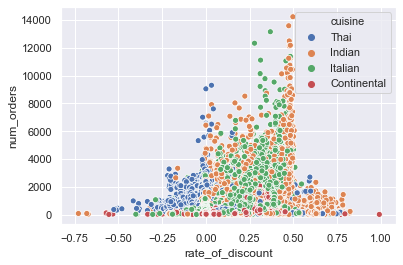

In [27]:
ax = sns.scatterplot(x="rate_of_discount", y="num_orders", hue="cuisine", data=df_train)

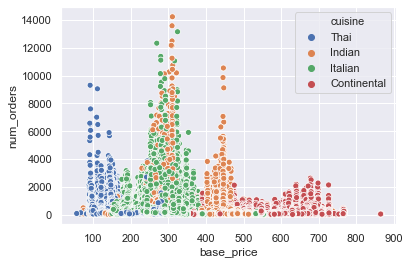

In [28]:
ax = sns.scatterplot(x="base_price", y="num_orders", hue="cuisine", data=df_train)

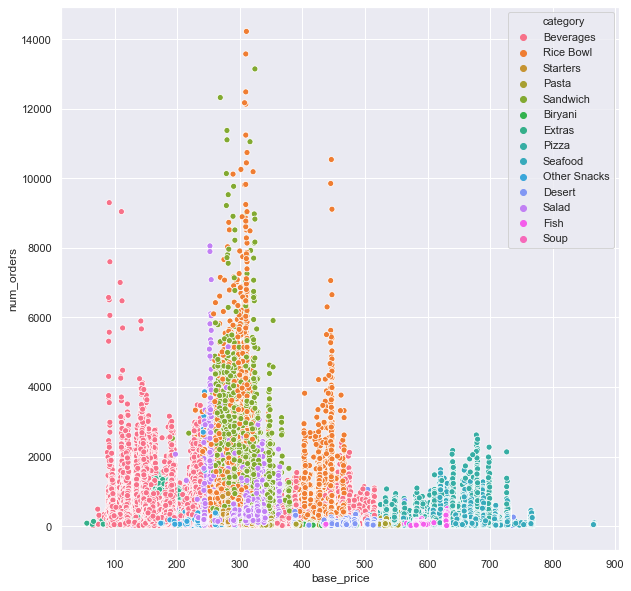

In [29]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.scatterplot(x="base_price", y="num_orders", hue="category", data=df_train)

### __Meal Analysis__

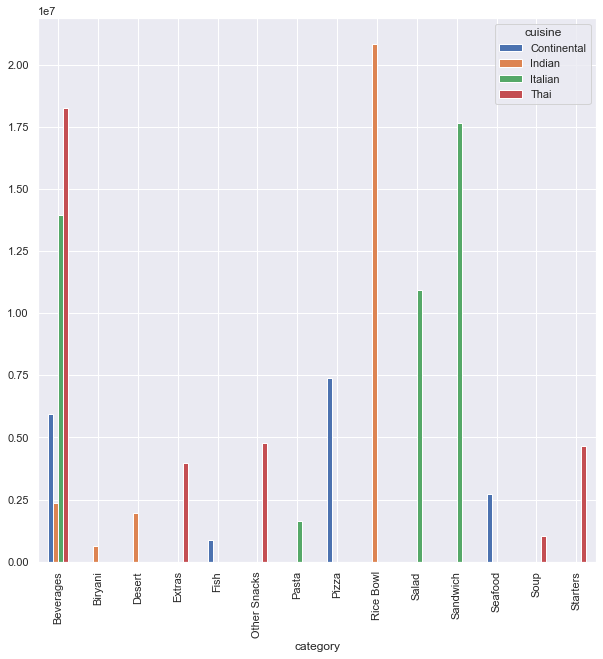

In [30]:
df_train.groupby(['cuisine','category'])['num_orders'].sum().unstack('cuisine').plot.bar()

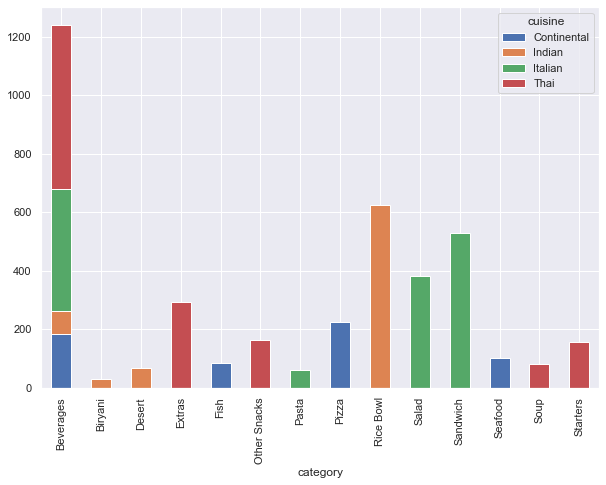

In [31]:
tmp = df_train.groupby(['cuisine','category']).mean()['num_orders'].unstack('cuisine').copy()
tmp.plot.bar(stacked=True, figsize=(10,7))

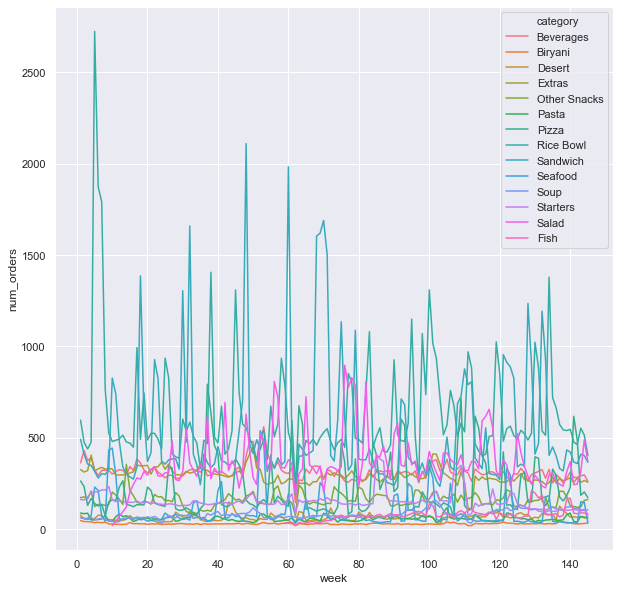

In [32]:
tmp = df_train.groupby(['week','category']).mean()['num_orders'].reset_index()
sns.lineplot(x='week', y="num_orders", data=tmp, hue='category')

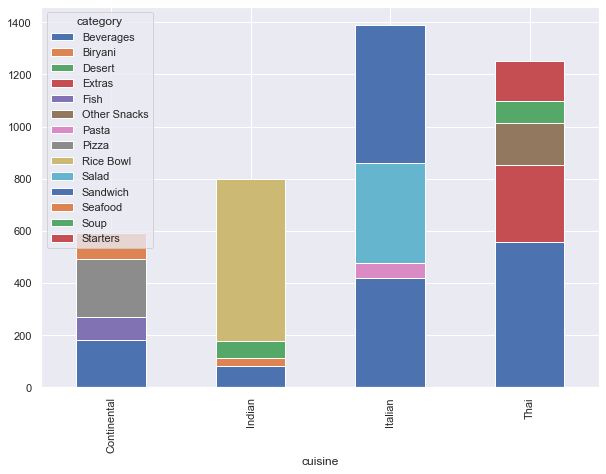

In [33]:
tmp = df_train.groupby(['cuisine','category']).mean()['num_orders'].unstack('category').copy()
tmp.plot.bar(stacked=True, figsize=(10,7))

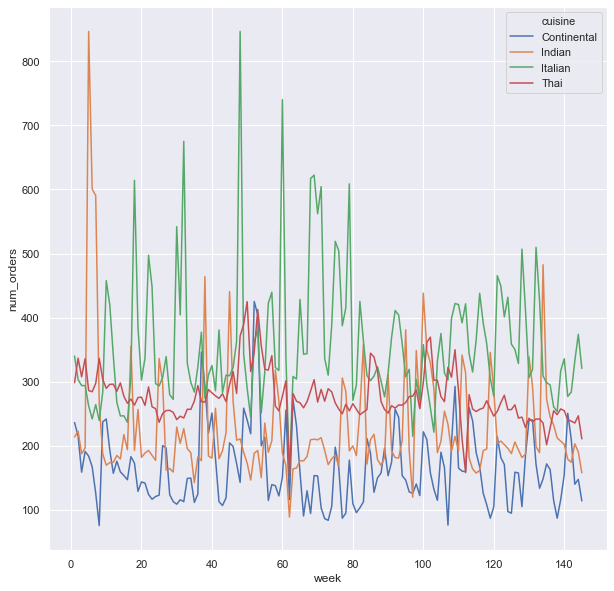

In [34]:
tmp = df_train.groupby(['week','cuisine']).mean()['num_orders'].reset_index()
sns.lineplot(x='week', y="num_orders", data=tmp, hue='cuisine')

### __Promotion Analysis__

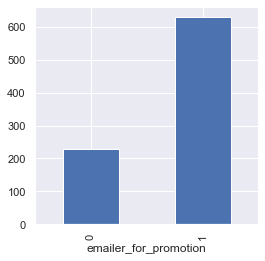

In [35]:
tmp = df_train.groupby(['emailer_for_promotion']).mean()['num_orders']#.reset_index()
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

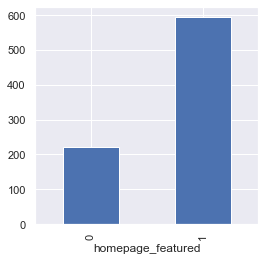

In [36]:
tmp = df_train.groupby(['homepage_featured']).mean()['num_orders']#.reset_index()
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

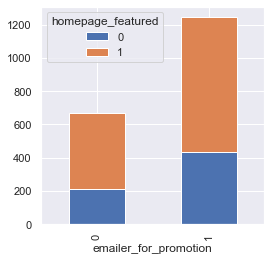

In [37]:
tmp = df_train.groupby(['homepage_featured','emailer_for_promotion']).mean()['num_orders'].unstack('homepage_featured').copy()
tmp.plot.bar(stacked = 'True', figsize=(4, 4))

### __Center__ analysis

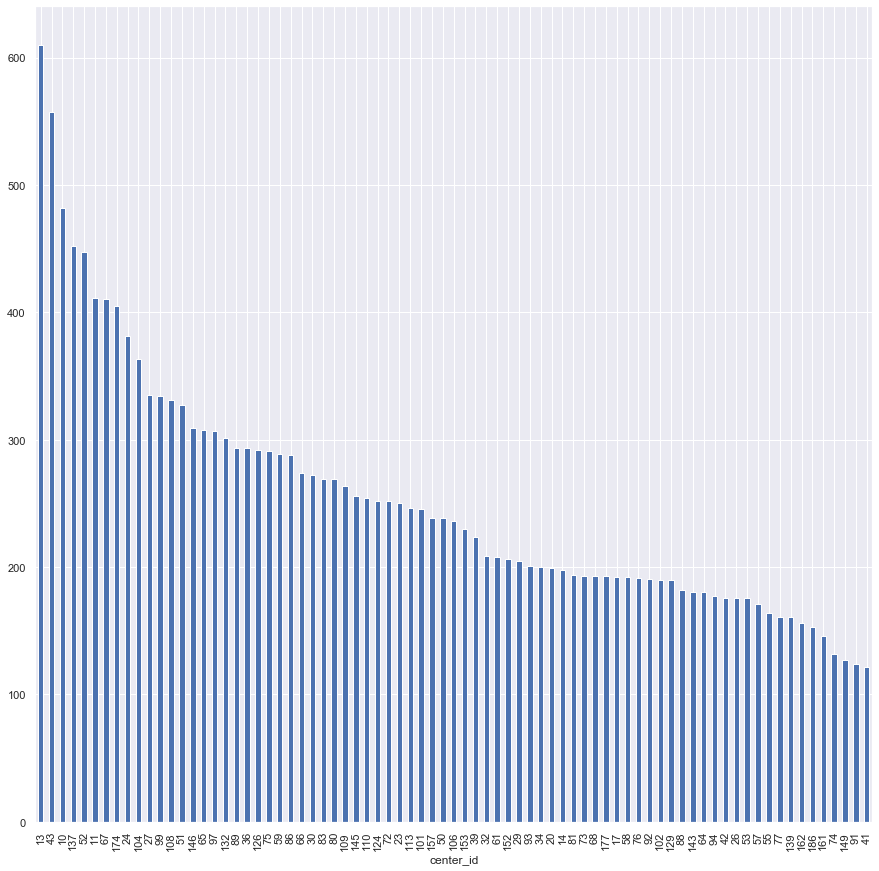

In [38]:
tmp = df_train.groupby(['center_id'])['num_orders'].mean().sort_values(ascending=False)
#fig = plt.gcf()
#fig.set_size_inches( 15,15)
tmp.plot.bar(figsize=(15,15))

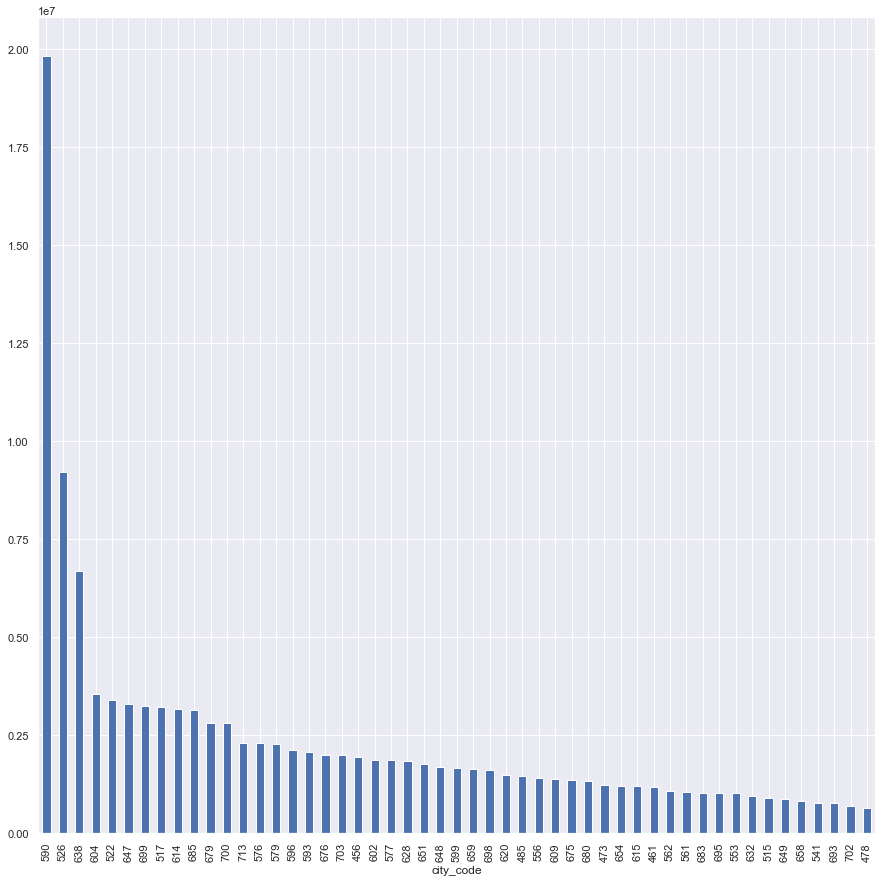

In [39]:
tmp = df_train.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False)
fig = plt.gcf()
fig.set_size_inches( 15,15)
tmp.plot.bar()

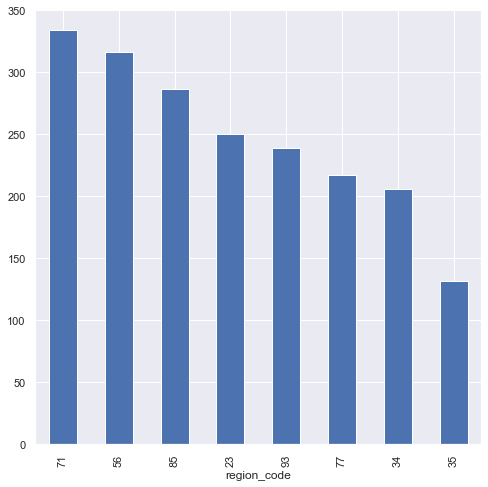

In [40]:
tmp = df_train.groupby(['region_code'])['num_orders'].mean().sort_values(ascending=False)
fig = plt.gcf()
fig.set_size_inches( 8,8)
tmp.plot.bar()

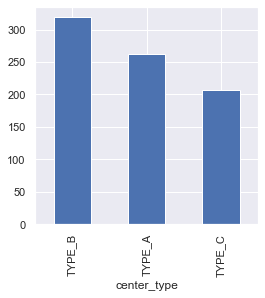

In [41]:
tmp = df_train.groupby(['center_type'])['num_orders'].mean().sort_values(ascending=False)
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

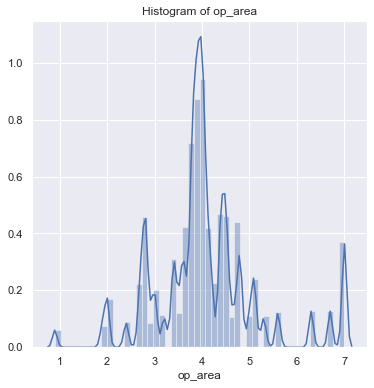

In [42]:
sns.distplot(df_train.op_area, kde=True)
plt.title('Histogram of op_area')
fig = plt.gcf()
fig.set_size_inches( 6,6)
plt.show();

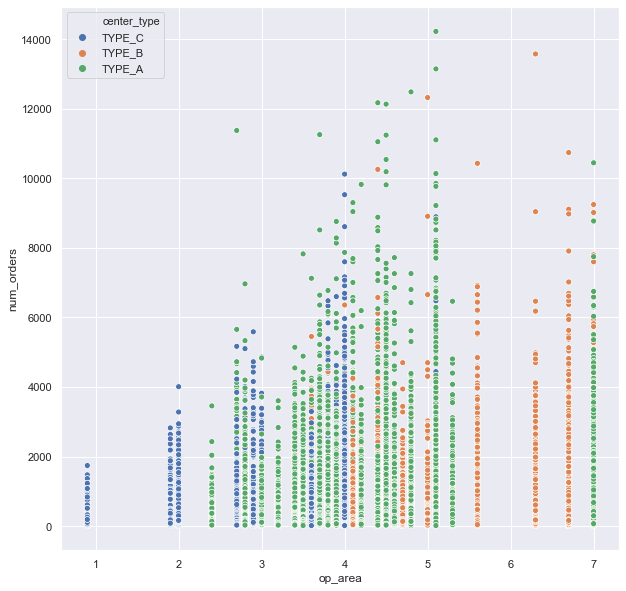

In [43]:
sns.scatterplot(x="op_area", y="num_orders", hue="center_type", data=df_train)

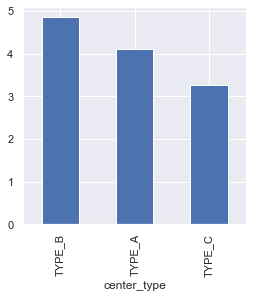

In [44]:
tmp = df_train.groupby(['center_type'])['op_area'].mean().sort_values(ascending=False)
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

### __Bivariate Analysis of center data__

In [45]:
df_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [46]:
from sklearn import preprocessing

label_encode_columns = ['center_id', 
                        'city_code', 
                        'region_code', 
                        'center_type']

le = preprocessing.LabelEncoder()

tmp = df_center.drop('op_area',axis=1)

for col in label_encode_columns:
    le.fit(tmp[col])
    tmp[col + '_encoded'] = le.transform(tmp[col])
    tmp.drop(col,axis=1, inplace = True)

tmp

,center_id_encoded,city_code_encoded,region_code_encoded,center_type_encoded
0,1,39,3,0
1,2,17,3,1
2,59,17,3,2
3,30,31,1,0
4,48,28,1,2
...,...,...,...,...
72,22,17,3,0
73,11,22,3,0
74,37,24,6,0
75,32,38,1,1


chi score of center_id_encoded:
(array([650.85780347,  71.89958159,  79.20754717]), array([3.48649490e-92, 6.11952142e-01, 3.78084924e-01]))
chi score of city_code_encoded:
(array([640.55116959,  71.89958159,  47.58831237]), array([1.90395751e-103, 2.28708609e-002, 5.70700823e-001]))
chi score of region_code_encoded:
(array([106.77627156, 124.50501077,   3.96966334]), array([4.27846831e-20, 8.81867008e-24, 7.83264907e-01]))
chi score of center_type_encoded:
(array([17.83981189,  3.20824172,  0.18865291]), array([1.33700819e-04, 2.01066242e-01, 9.09985644e-01]))


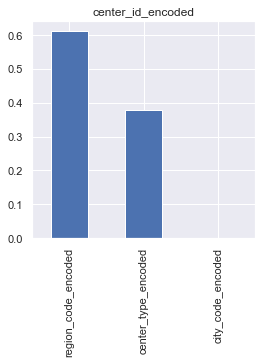

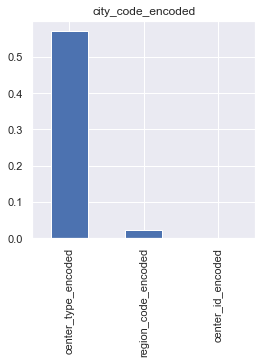

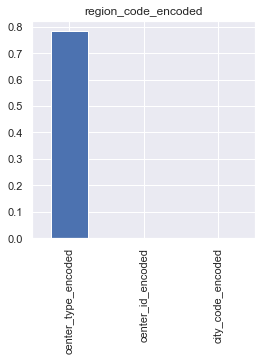

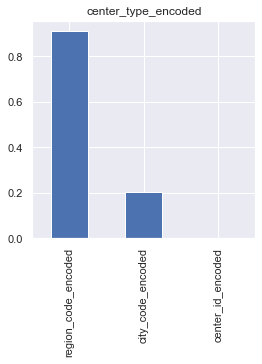

In [47]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

for col in tmp.columns:
    print('chi score of '+col+':')
    X = tmp.drop(col,axis=1)
    y = tmp[col]
    chi_scores = chi2(X,y)    
    print(chi_scores)
    fig = plt.figure(figsize=(4, 4))
    p_values = pd.Series(chi_scores[1],index = X.columns)
    p_values.sort_values(ascending = False , inplace = True)
    p_values.plot.bar().set_title(col)
    
    #chi2_selector = SelectKBest(chi2, k=2)
    #X_kbest = chi2_selector.fit_transform(X, y)
    #print(X_kbest.columns)

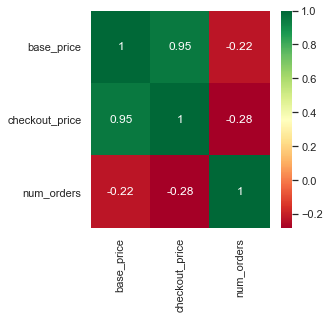

In [48]:
df = df_train[['base_price','checkout_price','num_orders']]
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

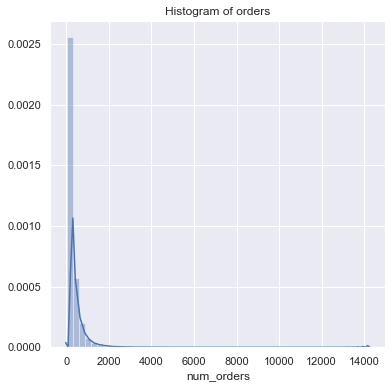

In [49]:
sns.distplot(df_train.num_orders, kde=True)
plt.title('Histogram of orders')
fig = plt.gcf()
fig.set_size_inches( 6,6)
plt.show();

In [50]:
# Log transform the target variable - num_orders.
df_train['num_orders_log1p'] = np.log1p(df_train['num_orders'])

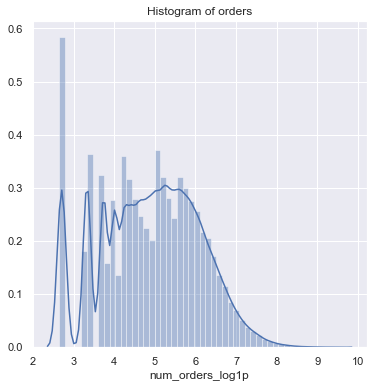

In [51]:
sns.distplot(df_train.num_orders_log1p, kde=True)
plt.title('Histogram of orders')
fig = plt.gcf()
fig.set_size_inches( 6,6)
plt.show();

In [52]:
df_train['Quarter']=(df_train['week']/13).astype('int64')
df_train['Quarter'] = df_train['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})
df_train['Year']=(df_train['week']/52).astype('int64')
df_train['Year'] = df_train['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3',
                         3:'Y4',
                         4:'Y5'})

df_test['Quarter']=(df_test['week']/13).astype('int64')
df_test['Quarter'] = df_test['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})
df_test['Year']=(df_test['week']/52).astype('int64')
df_test['Year'] = df_test['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3',
                         3:'Y4',
                         4:'Y5'})

### Writing the pre-processed data to flat files. Will use this in another program to prepare model.

In [53]:
df_train['city_region'] = df_train['city_code'].astype('str') + '_' + df_train['region_code'].astype('str')

df_test['city_region'] = df_test['city_code'].astype('str') + '_' + df_test['region_code'].astype('str')

In [54]:
label_encode_columns = ['center_id', 
                        'meal_id', 
                        'city_code', 
                        'region_code', 
                        'city_region', 
                        'center_type', 
                        'category', 
                        'cuisine']

le = preprocessing.LabelEncoder()

for col in label_encode_columns:
    le.fit(df_train[col])
    df_train[col + '_encoded'] = le.transform(df_train[col])
    df_test[col + '_encoded'] = le.transform(df_test[col])

In [55]:
df_train['cat_sales'] = df_train['discount'].apply(lambda x: 'S' if x == 0 else ('N' if x < 0 else 'P'))
df_test['cat_sales'] = df_test['discount'].apply(lambda x: 'S' if x == 0 else ('N' if x < 0 else 'P'))

In [56]:
def get_count_encode(train,test,col,name):
    temp=train.groupby(col)['num_orders'].mean().reset_index().rename(columns={'num_orders':name})
    train=pd.merge(train,temp,how='left',on=col)
    test=pd.merge(test,temp,how='left',on=col)
    train[name].fillna(np.median(temp[name]),inplace=True)
    test[name].fillna(np.median(temp[name]),inplace=True)
    return train,test

In [57]:
df_train,df_test = get_count_encode(df_train,df_test,col=['meal_id','center_id'],name='count_meal_center_id')
df_train,df_test = get_count_encode(df_train,df_test,col=['center_id','cuisine'],name='count_center_cuisine')
df_train,df_test = get_count_encode(df_train,df_test,col=['center_id','category'],name='count_center_category')

df_train,df_test = get_count_encode(df_train,df_test,col=['center_id','category','cuisine'],name='count_center_category_cuisine')
df_train,df_test = get_count_encode(df_train,df_test,col=['cuisine','category'],name='count_cuisine_category')

df_train,df_test = get_count_encode(df_train,df_test,col=['center_id'],name='count_center_id')
df_train,df_test = get_count_encode(df_train,df_test,col=['meal_id'],name='count_meal_id')

df_train,df_test = get_count_encode(df_train,df_test,col=['cuisine','region_code'],name='count_cuisine_region')
df_train,df_test = get_count_encode(df_train,df_test,col=['category','region_code'],name='count_category_region')

df_train,df_test = get_count_encode(df_train,df_test,col=['city_code','cuisine'],name='count_city_cuisine')

df_train,df_test = get_count_encode(df_train,df_test,col=['city_code','region_code'],name='count_city_region')

In [58]:
def get_price_encode(train,test,col,price='base_price',name='name'):
    temp=train.groupby(col)[price].mean().reset_index().rename(columns={price:name})
    train=pd.merge(train,temp,how='left',on=col)
    test=pd.merge(test,temp,how='left',on=col)
    train[name].fillna(np.median(temp[name]),inplace=True)
    test[name].fillna(np.median(temp[name]),inplace=True)
    return train,test

In [60]:
df_train,df_test = get_price_encode(df_train,df_test,col=['meal_id','center_id'],price='base_price',
                              name='price_meal_center')
df_train,df_test = get_price_encode(df_train,df_test,col=['meal_id','center_id'],price='checkout_price',
                              name='price_co_meal_center')
df_train,df_test = get_price_encode(df_train,df_test,col=['center_id','cuisine'],price='base_price',
                              name='price_meal')
df_train,df_test = get_price_encode(df_train,df_test,col=['center_id','cuisine'],price='checkout_price',
                              name='price_co_meal')

In [61]:
df_train.to_csv('input/train_processed.csv')
df_test.to_csv('input/test_processed.csv')